<a href="https://colab.research.google.com/github/Cpt-Shaan/Summer_Intern_2024_IvLabs/blob/main/MNIST_PyTorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Implementation of the Hand-written digit recognition model (Using MNIST dataset) using PyTorch. Used a CNN architecture (based on the Le-Net architecture) for the implementation.

Importing the necessary libraries

In [ ]:
from torchvision import datasets  # To access the MNIST dataset
from torchvision.transforms import ToTensor
from torch.utils.data import DataLoader
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torch

Downloading and Separating the Training and Testing Datasets

In [ ]:
train_data = datasets.MNIST( root = 'data' , train = True , transform = ToTensor() , download = True)
test_data = datasets.MNIST(root = 'data' , train = False , transform = ToTensor() , download = True)

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:00<00:00, 32505962.58it/s]


Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 1100843.28it/s]


Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:00<00:00, 8973670.76it/s]


Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 6902365.50it/s]

Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



Converting to the Dataloader format

In [ ]:
train_loader = DataLoader(train_data, batch_size = 1024)
test_loader = DataLoader(test_data, batch_size = 1024)

Defining the Model Architecture.


1.   2D Convolutional layer with filter size 5 and 6 feature maps
2.   Maxpooling Layer with stride = 2
3.   2D Convolutional layer with filter size 5 and 16 feature maps
4.   Maxpooling Layer with stride = 2
5.   Fully Connected Dense layer of 256 neurons
6.   Fully Connected Dense layer of 120 neurons
7.   Fully Connected Dense layer of 84 neurons
8.   Fully Connected Dense layer of 10 neurons (softmax output of 10 classes)

1,3,5,6,7 are followed by a ReLu non-linearity


In [ ]:
class CNN(nn.Module):
  def __init__(self):
    super(CNN, self).__init__()

    # Network Architecture - Le Net Architecture
    self.conv1 = nn.Conv2d(1,6,5)
    self.conv2 = nn.Conv2d(6,16,5)
    self.fc1 = nn.Linear(256,120)
    self.fc2 = nn.Linear(120,84)
    self.fc3 = nn.Linear(84,10)

  def forward(self, x):
    x = F.relu(F.max_pool2d(self.conv1(x),2))
    x = F.relu(F.max_pool2d(self.conv2(x),2))
    x = x.view(-1,256)
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = F.softmax(self.fc3(x))
    return x

Entering the training and the testing data on the device and setting the loss function for training (Cross Entropy Loss). Defining the functions for training and testing the data.

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu') # Checking availibilty of GPU , else using CPU
model = CNN().to(device)
optimizer = optim.Adam(model.parameters() , lr = 0.001)
loss_fn = nn.CrossEntropyLoss() # Loss Function for the model

# List to store accuracy and loss during epochs , and further use it for plotting against no of epochs
accuracy = []
loss = []

def train(epoch):
  model.train() # Setting Model Mode to training
  for batch_idx, (data,target) in enumerate(train_loader):
    data, target = data.to(device) , target.to(device)
    optimizer.zero_grad() # Initializing gradients to zero
    output = model(data)
    loss = loss_fn(output, target)
    loss.backward() # Backward Prop step
    optimizer.step()

    # Printing the loss after every 20 batches
    if batch_idx % 20 == 0:
      print(f'Train epoch {epoch} [{batch_idx * len(data)} / {len(train_loader.dataset)} ({100. * batch_idx / len(train_loader) :.0f}%)] \t {loss.item() :.4f}')

def test():
  model.eval()  # Setting Model mode to testing (Deactivates dropout steps if any)
  test_loss = 0
  correct = 0

  with torch.no_grad():
    for data, target in test_loader:
      data, target = data.to(device) , target.to(device)
      output = model(data)  # Forward Propogation only
      test_loss += loss_fn(output, target).item()
      pred = output.argmax(dim=1, keepdim = True)
      correct += pred.eq(target.view_as(pred)).sum().item()

  # Appeniding the epoch loss and accuracy to the lists
  accuracy.append(100. * correct / len(test_loader.dataset))
  loss.append(test_loss)
  test_loss /= len(test_loader.dataset)

  print(f'Test Set Average Loss: {test_loss} , Accuracy: {correct} / {len(test_loader.dataset)} ({100. * correct / len(test_loader.dataset):.0f}%\n)')


Training the model and simultaneously display testing accuracy and loss

In [ ]:
epochs = 50
for epoch in range(1,epochs):
  train(epoch)
  test()

<ipython-input-11-14ee20e58f22>:18: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = F.softmax(self.fc3(x))


Train epoch 1 [0 / 60000 (0%)] 	 2.3027
Train epoch 1 [20480 / 60000 (34%)] 	 2.2184
Train epoch 1 [40960 / 60000 (68%)] 	 1.9589
Test Set Average Loss: 0.0018462893724441529 , Accuracy: 6185 / 10000 (62%
)
Train epoch 2 [0 / 60000 (0%)] 	 1.8518
Train epoch 2 [20480 / 60000 (34%)] 	 1.8419
Train epoch 2 [40960 / 60000 (68%)] 	 1.8376
Test Set Average Loss: 0.0017944286346435548 , Accuracy: 6632 / 10000 (66%
)
Train epoch 3 [0 / 60000 (0%)] 	 1.7915
Train epoch 3 [20480 / 60000 (34%)] 	 1.7341
Train epoch 3 [40960 / 60000 (68%)] 	 1.7310
Test Set Average Loss: 0.0017055930614471436 , Accuracy: 7561 / 10000 (76%
)
Train epoch 4 [0 / 60000 (0%)] 	 1.7028
Train epoch 4 [20480 / 60000 (34%)] 	 1.7065
Train epoch 4 [40960 / 60000 (68%)] 	 1.7064
Test Set Average Loss: 0.0016949570655822755 , Accuracy: 7665 / 10000 (77%
)
Train epoch 5 [0 / 60000 (0%)] 	 1.6928
Train epoch 5 [20480 / 60000 (34%)] 	 1.6969
Train epoch 5 [40960 / 60000 (68%)] 	 1.6943
Test Set Average Loss: 0.00168867422342300

Maximum Accuracy of 98.69 % achieved on test set after 50 epochs.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import linspace
loss = np.array(loss)
accuracy = np.array(accuracy)
loss /= len(test_loader.dataset)

Plotting the Loss values obtained v/s No of Iterations

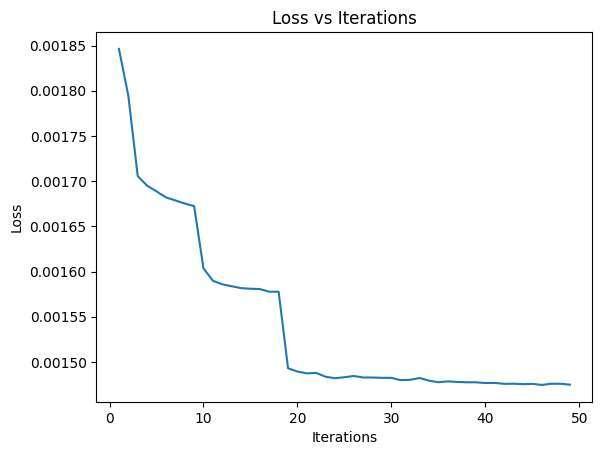

In [ ]:
iters = linspace(1,49,49)

plt.plot(iters,loss)
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Loss vs Iterations')
plt.show()

Plotting the Accuracy values v/s No of iterations

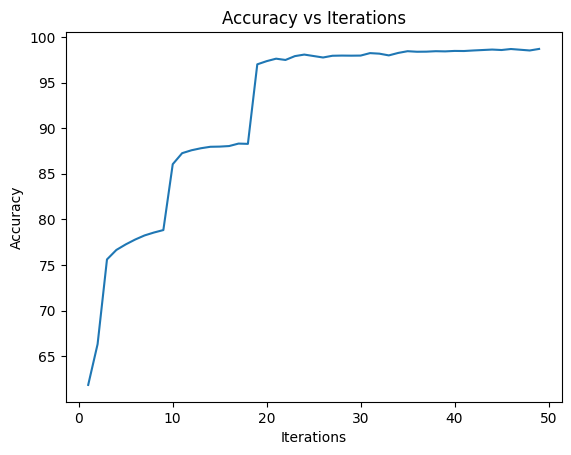

In [ ]:
plt.plot(iters,accuracy)
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Iterations')
plt.show()
